<a href="https://colab.research.google.com/github/SanskarAgrahari-07/Deep-Learning-and-Neural-Networks-Lab-Work/blob/main/nndl_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [9]:
!kaggle datasets download -d techsash/waste-classification-data --unzip

Dataset URL: https://www.kaggle.com/datasets/techsash/waste-classification-data
License(s): CC-BY-SA-4.0
 94% 403M/427M [00:03<00:00, 91.1MB/s]
100% 427M/427M [00:03<00:00, 117MB/s] 


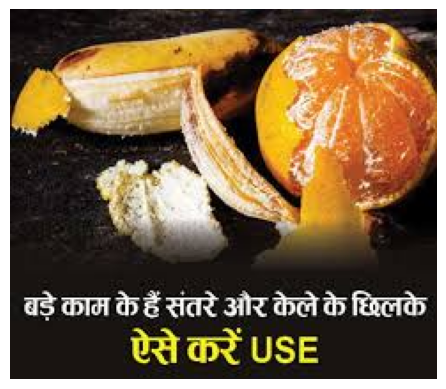

In [10]:
import os
import cv2
import matplotlib.pyplot as plt

# Define path to images
image_folder = "DATASET/TEST/O"  # Update based on folder structure
image_files = os.listdir(image_folder)

# Read and display the first image
img_path = os.path.join(image_folder, image_files[1])
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for proper display

plt.imshow(img)
plt.axis("off")
plt.show()

In [4]:

train_dir = '/content/DATASET/TRAIN'
test_dir = '/content/DATASET/TEST'

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 142s 193ms/step - accuracy: 0.7713 - loss: 0.5175 - val_accuracy: 0.8723 - val_loss: 0.3456
Epoch 2/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 133s 189ms/step - accuracy: 0.8193 - loss: 0.4161 - val_accuracy: 0.8635 - val_loss: 0.3506
Epoch 3/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 131s 185ms/step - accuracy: 0.8325 - loss: 0.3892 - val_accuracy: 0.8743 - val_loss: 0.3298
Epoch 4/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 141s 184ms/step - accuracy: 0.8463 - loss: 0.3686 - val_accuracy: 0.8655 - val_loss: 0.3332
Epoch 5/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 130s 184ms/step - accuracy: 0.8478 - loss: 0.3619 - val_accuracy: 0.8723 - val_loss: 0.3237
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.8830 - loss: 0.2965
Test Accuracy: 0.8723


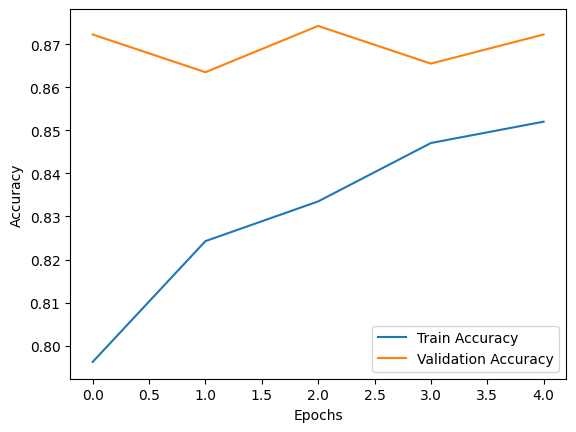

In [11]:
img_size = (150, 150)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, epochs=5, validation_data=test_generator)

test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

model.save("waste_classification_model.h5")

A1. Design and train a convolutional neural network (CNN). Inspect the CNN architecture. Sample
code provided for help

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.
{'O': 0, 'R': 1}


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 72, 72, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 34, 34, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,830,018 (18.43 MB)

 Trainable params: 4,829,314 (18.42 MB)

 Non-trainable params: 704 (2.75 KB)

Epoch 1/15
706/706 ━━━━━━━━━━━━━━━━━━━━ 145s 194ms/step - accuracy: 0.7640 - loss: 0.6085 - val_accuracy: 0.8265 - val_loss: 0.3730
Epoch 2/15
706/706 ━━━━━━━━━━━━━━━━━━━━ 132s 187ms/step - accuracy: 0.8261 - loss: 0.4038 - val_accuracy: 0.8627 - val_loss: 0.3423
Epoch 3/15
706/706 ━━━━━━━━━━━━━━━━━━━━ 133s 188ms/step - accuracy: 0.8374 - loss: 0.3848 - val_accuracy: 0.8516 - val_loss: 0.3389
Epoch 4/15
706/706 ━━━━━━━━━━━━━━━━━━━━ 133s 188ms/step - accuracy: 0.8438 - loss: 0.3654 - val_accuracy: 0.8197 - val_loss: 0.4441
Epoch 5/15
706/706 ━━━━━━━━━━━━━━━━━━━━ 131s 186ms/step - accuracy: 0.8500 - loss: 0.3566 - val_accuracy: 0.7990 - val_loss: 0.4134
Epoch 6/15
706/706 ━━━━━━━━━━━━━━━━━━━━ 132s 186ms/step - accuracy: 0.8568 - loss: 0.3318 - val_accuracy: 0.7696 - val_loss: 0.4992
Epoch 7/15
706/706 ━━━━━━━━━━━━━━━━━━━━ 132s 186ms/step - accuracy: 0.8698 - loss: 0.3193 - val_accuracy: 0.8981 - val_loss: 0.2587
Epoch 8/15
706/706 ━━━━━━━━━━━━━━━━━━━━ 132s 186ms/step - accuracy: 0.8699 -

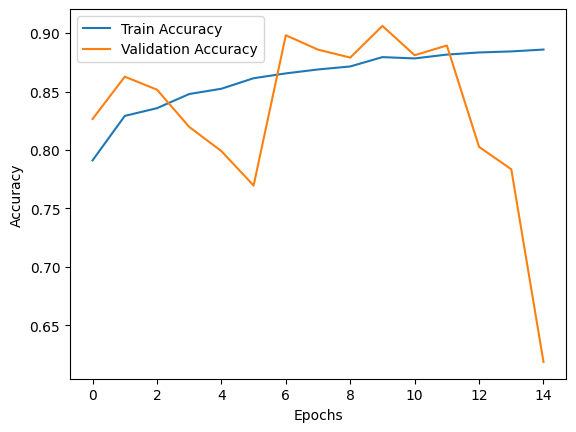

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import Input
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import numpy as np
import os


# Image parameters
img_size = (150, 150)  # Resize images
batch_size = 32

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Check class indices
print(train_generator.class_indices)

# CNN Model Architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    # Output Layer: Adjust units to number of classes (e.g., 6 for 6 waste categories)
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the Model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
# Model Summary
model.summary()

# Train the Model
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=test_generator
)

# Evaluate the Model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot Training History
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Save the Model
model.save("waste_classification_model.h5")


A2. Train the model with the training data. Plot the training and validation losses for the training
session. Observe the graphs and interpret.

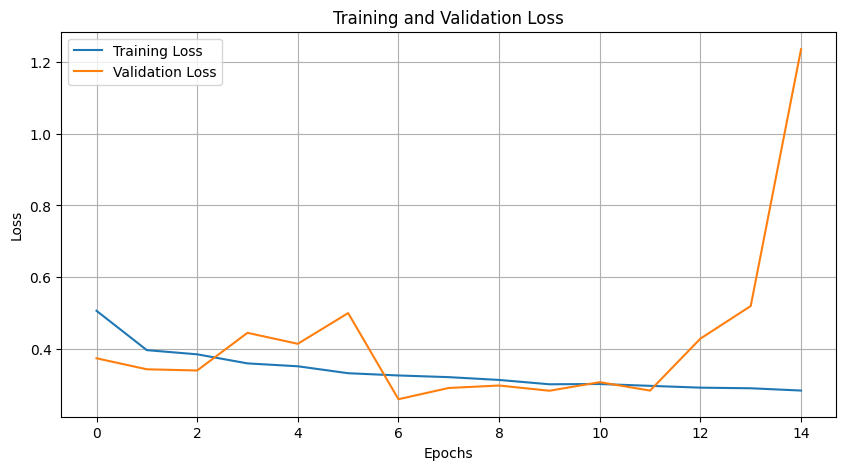

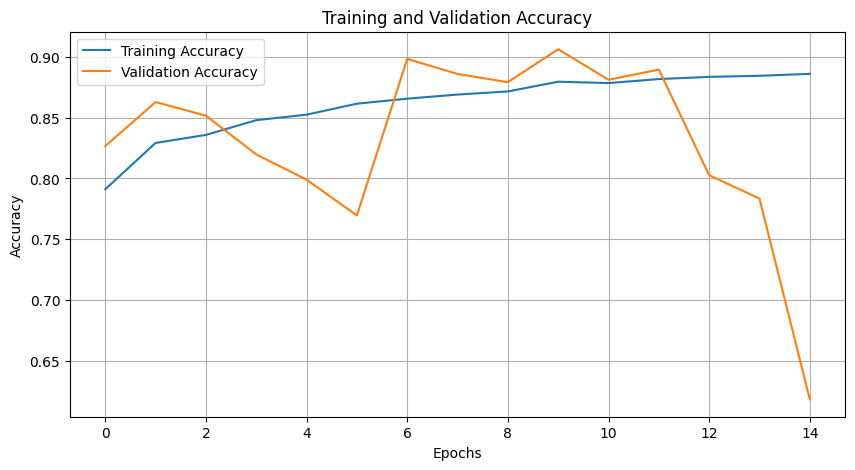

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

A3.Evaluate the model accuracy with below code

In [23]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, verbose=1)

# Print the accuracy
print(f"Test Accuracy: {test_acc:.4f}")
score = model.evaluate(test_X[0:100],test_Y_one_hot[0:100], verbose=1)
print('\nKeras CNN binary accuracy:', score[1],'\n')


InvalidArgumentError: Graph execution error:

Detected at node sequential_1_1/flatten_1_1/Reshape defined at (most recent call last):
<stack traces unavailable>
only one input size may be -1, not both 0 and 1

Stack trace for op definition: 
File "<frozen runpy>", line 198, in _run_module_as_main
File "<frozen runpy>", line 88, in _run_code
File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start
File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever
File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once
File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run
File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one
File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request
File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute
File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell
File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
File "<ipython-input-19-f627178667aa>", line 7, in <cell line: 0>
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 484, in evaluate
File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function
File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator
File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 113, in one_step_on_data
File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 89, in test_step
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py", line 908, in __call__
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/operation.py", line 46, in __call__
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/models/sequential.py", line 213, in call
File "/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py", line 182, in call
File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/function.py", line 171, in _run_through_graph
File "/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py", line 637, in call
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py", line 908, in __call__
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/operation.py", line 46, in __call__
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py", line 54, in call
File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/numpy.py", line 4868, in reshape
File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/numpy.py", line 1915, in reshape

	 [[{{node sequential_1_1/flatten_1_1/Reshape}}]]
	tf2xla conversion failed while converting __inference_one_step_on_data_242744[]. Run with TF_DUMP_GRAPH_PREFIX=/path/to/dump/dir and --vmodule=xla_compiler=2 to obtain a dump of the compiled functions.
	 [[StatefulPartitionedCall]] [Op:__inference_multi_step_on_iterator_242809]

A4. Inspect the filters (at least a few of them) for the first convolution layer.

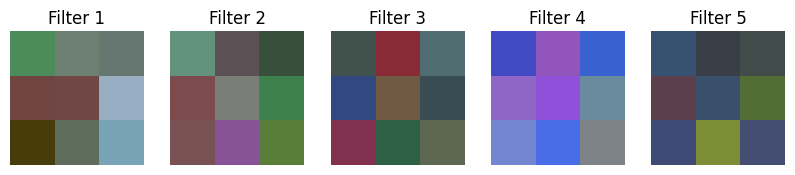

In [24]:
# Get the weights of the first Conv2D layer
filters, biases = model.layers[0].get_weights()

# Normalize filter values for better visualization
filters_min, filters_max = filters.min(), filters.max()
filters = (filters - filters_min) / (filters_max - filters_min)

# Plot the first 5 filters
plt.figure(figsize=(10, 5))
for i in range(5):  # Adjust number if needed
    plt.subplot(1, 5, i + 1)
    plt.imshow(filters[:, :, :, i], cmap='gray')
    plt.axis('off')
    plt.title(f"Filter {i+1}")

plt.show()


A5. Inspect the impact a filter creates on an input image with 2D convolution.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Select an image from the training dataset
sample_image, _ = train_generator.next()  # Get a batch of images
sample_image = sample_image[0]  # Take the first image
sample_image_gray = np.mean(sample_image, axis=-1)  # Convert to grayscale if needed

# Display the original image
plt.imshow(sample_image_gray, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

# Extract filters from the first convolutional layer
filters, biases = model.layers[0].get_weights()

# Choose a filter (e.g., second filter)
chosen_filter = filters[:, :, :, 1]  # Shape (3,3,3) for RGB filters

# Convert to grayscale filter by averaging across channels
chosen_filter_gray = np.mean(chosen_filter, axis=-1)

# Apply 2D convolution
filtered_image = signal.convolve2d(sample_image_gray, chosen_filter_gray, boundary='symm', mode='same')

# Display the filtered image
plt.imshow(filtered_image, cmap='gray')
plt.title("Filtered Image")
plt.axis('off')
plt.show()


AttributeError: 'DirectoryIterator' object has no attribute 'next'

A6.Design and implement a fully connected and dense network to perform classification on your
dataset. Train the network with training & validation sets.


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Define the fully connected model
dense_model = Sequential([
    Flatten(input_shape=(150, 150, 3)),  # Flatten the input image
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')  # Output layer
])

# Compile the model
dense_model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

# Train the model
dense_history = dense_model.fit(
    train_generator,
    epochs=15,
    validation_data=test_generator
)

# Save the model
dense_model.save("waste_classification_dense_model.h5")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
706/706 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.6670 - loss: 4.7850

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_4" is incompatible with the layer: expected axis -1 of input shape to have value 67500, but received input with shape (None, 196608)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 256, 256, 3), dtype=float32)
  • training=False
  • mask=None

A7. Make a plot of training loss and validation loss to check for the regular fit of the trained network.


In [ ]:
import matplotlib.pyplot as plt

# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(dense_history.history['loss'], label='Training Loss')
plt.plot(dense_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (Dense Network)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(dense_history.history['accuracy'], label='Training Accuracy')
plt.plot(dense_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (Dense Network)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


A8. Test the network with your test set and observe the metrics.

In [ ]:
# Evaluate the Dense Model on the Test Set
test_loss, test_acc = dense_model.evaluate(test_generator, verbose=1)

# Print the accuracy
print(f"Test Accuracy (Dense Network): {test_acc:.4f}")